In [2]:
# 필요한 라이브러리를 임포트합니다.
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

**히스토그램 평활화(Histogram Equalization)**는 이미지를 더 선명하게 보이도록 명암 대비(contrast)를 향상시키는 영상 처리 기법입니다.

히스토그램: 이미지의 각 픽셀 값(밝기 값)의 빈도 분포를 나타낸 그래프입니다.
평활화: 히스토그램을 전체 범위(0~255)에 걸쳐 고르게 분포시키는 것입니다.
원리 요약

이미지의 밝기 분포가 한쪽에 치우쳐 있으면 어두운 부분이나 밝은 부분이 뭉쳐져 보입니다.
히스토그램 평활화는 누적 분포 함수(CDF)를 이용하여 픽셀 값을 다시 매핑합니다.
결과적으로 이미지의 밝기 값이 전체 범위에 걸쳐 퍼지게 되어, 어두운 부분은 더 밝게, 밝은 부분은 더 어둡게 되어 대비가 향상됩니다.

원본 이미지가 전체적으로 어두운 경우, 히스토그램 평활화 후에는 밝은 영역이 늘어나 이미지가 밝아집니다.

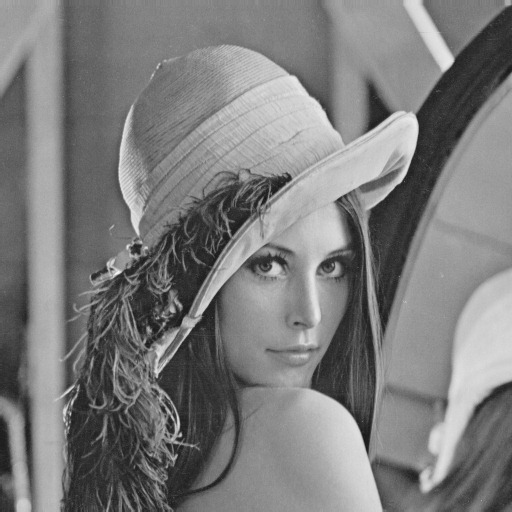

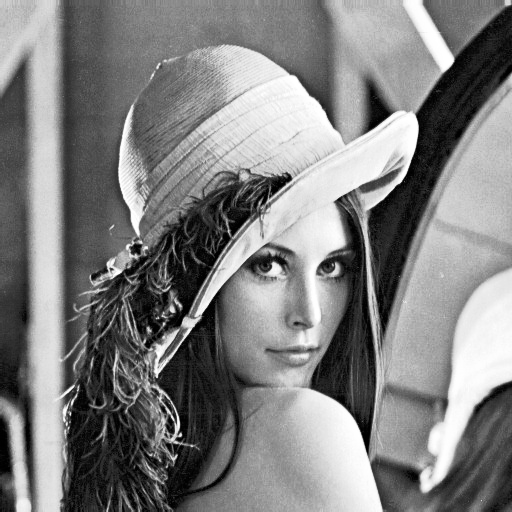

In [3]:
# # 이미지를 업로드하세요 (Colab 파일 업로더 사용)
# from google.colab import files
# uploaded = files.upload()

# 그레이스케일 이미지 불러오기
img_gray = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

if img_gray is None:
    print('이미지 로드 실패!')
else:
    # 히스토그램 평활화 적용
    img_eq_gray = cv2.equalizeHist(img_gray)

    # 원본과 결과 이미지 출력
    cv2_imshow(img_gray)
    cv2_imshow(img_eq_gray)

그레이스케일 이미지를 불러와 히스토그램 평활화를 적용합니다.
히스토그램 평활화는 이미지의 명암 대비를 높여, 더 뚜렷한 영상을 얻을 수 있게 해줍니다.



cv2.equalizeHist(src)는 OpenCV에서 제공하는 히스토그램 평활화 함수로, 입력된 그레이스케일 이미지의 픽셀 값을 자동으로 평활화된 값으로 변환해 줍니다.

원리:

입력 이미지의 히스토그램을 계산합니다.

히스토그램의 누적 분포 함수(CDF, cumulative distribution function)를 구합니다.

각 픽셀의 값(0~255)을 CDF에 따라 새로운 값으로 변환합니다.

픽셀 값이 많이 몰려 있던 영역은 더 넓은 범위로 퍼지게 되고, 명도 분포가 평탄해집니다.

결과적으로 대비가 향상된 이미지를 반환합니다.

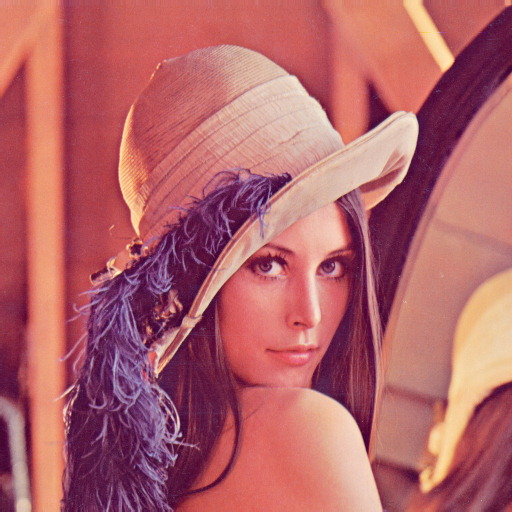

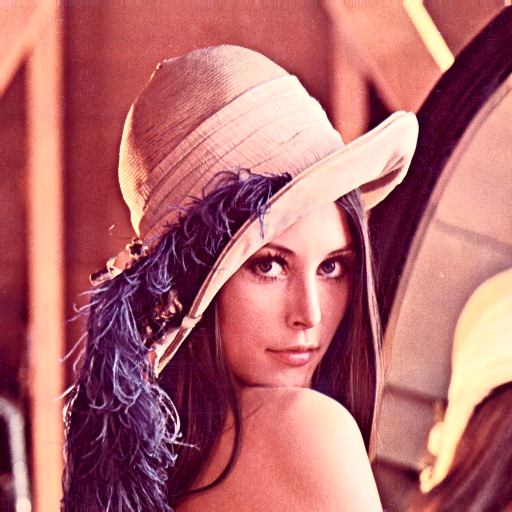

In [4]:
# 컬러 이미지 불러오기
img_color = cv2.imread('lenna.bmp')

if img_color is None:
    print('이미지 로드 실패!')
else:
    # YCrCb 색공간으로 변환 (밝기 성분 분리)
    img_ycrcb = cv2.cvtColor(img_color, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(img_ycrcb)

    # 밝기(Y) 성분에만 히스토그램 평활화 적용
    y_eq = cv2.equalizeHist(y)

    # 다시 합치고 BGR로 변환
    img_ycrcb_eq = cv2.merge([y_eq, cr, cb])
    img_color_eq = cv2.cvtColor(img_ycrcb_eq, cv2.COLOR_YCrCb2BGR)

    # 원본과 결과 이미지 출력
    cv2_imshow(img_color)
    cv2_imshow(img_color_eq)

컬러 이미지의 히스토그램 평활화는 명도(Y) 성분만 평활화하여 색상 왜곡을 최소화합니다.
YCrCb 색공간으로 변환 후 Y에만 적용하고, 다시 BGR로 변환하여 결과를 확인합니다.

YCrCb 색공간

YCrCb는 영상 신호에서 많이 쓰이는 색공간으로,
Y: 밝기(luminance, 명도) 성분
Cr, Cb: 색차 성분 (Red 차, Blue 차)
RGB(빨강, 초록, 파랑)와는 다르게, 밝기와 색상을 분리해서 표현합니다.

왜 YCrCb로 변환하는가?

컬러 영상에서 히스토그램 평활화를 직접 RGB 각 채널에 적용하면 색상 왜곡이 생길 수 있습니다.
대부분의 시각 정보는 밝기(Y) 성분에 집중되어 있습니다.
→ 밝기 성분(Y)에만 히스토그램 평활화를 적용하면 색상은 유지하면서 명암 대비만 향상시킬 수 있습니다.

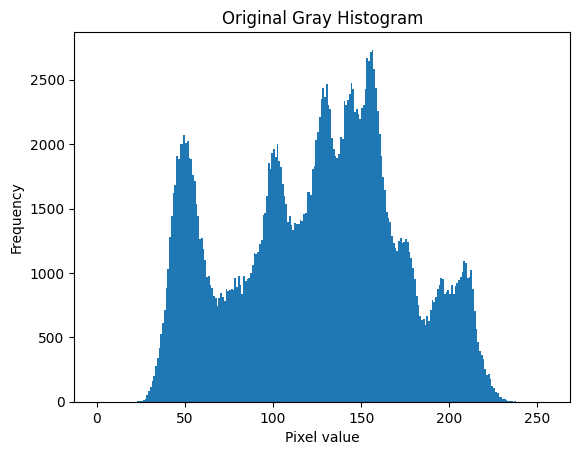

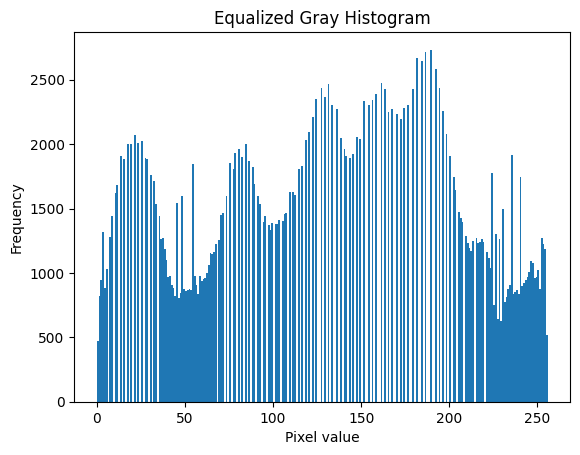

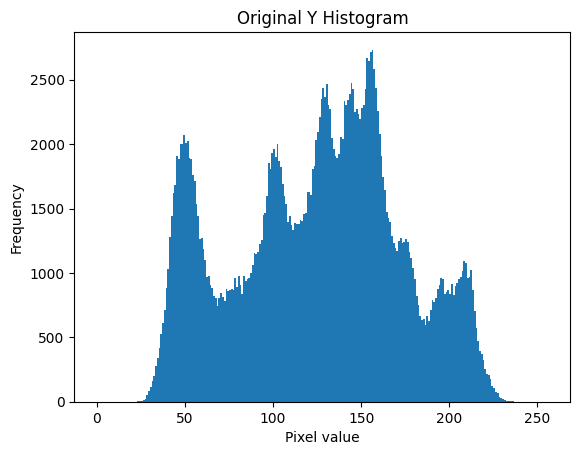

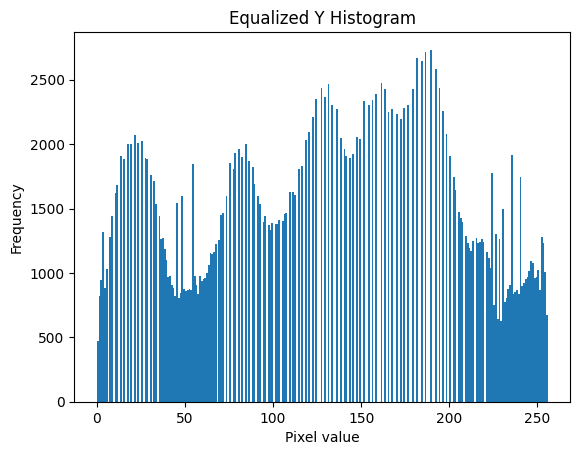

In [5]:
import matplotlib.pyplot as plt

def show_histogram(img, title='Histogram'):
    plt.figure()
    plt.title(title)
    plt.xlabel('Pixel value')
    plt.ylabel('Frequency')
    plt.hist(img.ravel(), bins=256, range=[0,256])
    plt.show()

# 그레이스케일 원본/평활화 이미지 히스토그램
show_histogram(img_gray, 'Original Gray Histogram')
show_histogram(img_eq_gray, 'Equalized Gray Histogram')

# 컬러(Y 성분) 원본/평활화 이미지 히스토그램
show_histogram(y, 'Original Y Histogram')
show_histogram(y_eq, 'Equalized Y Histogram')

히스토그램 평활화 전후의 히스토그램을 시각화하여, 명암 분포가 어떻게 바뀌었는지 확인할 수 있습니다.

히스토그램 평활화 후에는 픽셀 값이 더 고르게 분포된 것을 볼 수 있습니다.

### 히스토그램 정규화 (Histogram Normalization)
정규화란?
이미지의 픽셀 값(밝기 값)을 전체적으로 원하는 범위로 맞추는 작업입니다.

예를 들어, 어떤 이미지의 픽셀 값이 50 ~ 200 사이에만 분포되어 있다면,
정규화를 하면 0~255 전체 범위로 늘려서 어두운 부분은 더 어둡게, 밝은 부분은 더 밝게 보이도록 만듭니다.
이미지의 대비(contrast)를 증가시킬 수 있지만, 픽셀 값이 전체 범위에 고르게 분포되지는 않습니다.

###  히스토그램 평활화 (Histogram Equalization)

평활화란?
이미지의 픽셀 값 분포(히스토그램)를 전체 밝기 범위(0~255)에 '고르게' 분포시키는 작업입니다.

원래 히스토그램이 한쪽(예: 어두운 쪽)에 몰려 있다면, 평활화를 하면 히스토그램이 전체적으로 평평해집니다.
많이 등장하는 밝기값이 줄어들고, 적게 등장하는 밝기값이 늘어나서, 전체적으로 픽셀 값이 골고루 분포됩니다.
결과적으로, 이미지의 명암 대비가 더 좋아집니다.


구분	| 정규화 (Normalization)	| 평활화 (Equalization)

목적	| 픽셀 값 범위 조정	| 픽셀 값 분포 고르게 함

원리	| 최소최대 값을 0~255로 늘림| 누적 분포(CDF)로 평탄하게 변환

결과	| 명암 대비 증가, 분포는 그대로	| 명암 대비 증가, 분포가 평탄함

히스토그램	| 전체 범위로 늘어남	| 전체 범위에 고르게 분포